# *Linear Regression with Python Scikit Learn*
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

# *Simple Linear Regression*
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import numpy as np
%matplotlib inline

In [2]:
# Reading data from the given link

url = "http://bit.ly/w-data"
data= pd.read_csv(url)
print("Data imported successfully")

data.head(15)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Plot the given data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

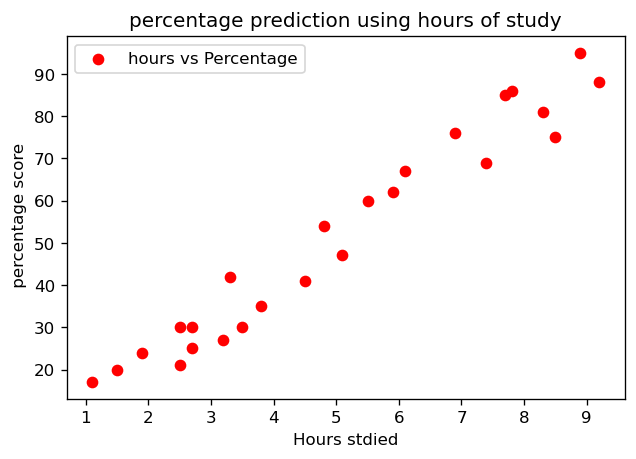

In [3]:

plt.figure(dpi=120)
k=range(0,len(data))
x=data['Hours']
y=data['Scores']
plt.scatter(x,y,color='r',label='hours vs Percentage')
plt.xlabel('Hours stdied')
plt.ylabel(' percentage score')
plt.title('percentage prediction using hours of study')
plt.legend()


# From the above graph we can notice that there is a positive linear relation between the hours studied and percentage score.

In [4]:
## lets divide the data in to two 'attributes' and 'labels'

X=data[['Hours']]
y=data['Scores']


# now we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [5]:

from sklearn.model_selection import train_test_split
model=train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=.2,random_state=0)


In [6]:
len(X_train)

20

In [7]:
print(X[0:5])
print()
print('scores')
print(y[0:5])

   Hours
0    2.5
1    5.1
2    3.2
3    8.5
4    3.5

scores
0    21
1    47
2    27
3    75
4    30
Name: Scores, dtype: int64


# now after train and test the data its time to train our algorithm

In [8]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg=linear_model.LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

# Score of the data

In [9]:
lin_reg.score(X_test,y_test)

0.9454906892105356

In [10]:
## ploting the linear regression model in graph 


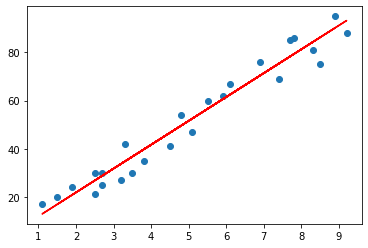

In [11]:
line = lin_reg.coef_*X+lin_reg.intercept_  ## y=mx+c

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line,color='r');
plt.show()

# Making predections


In [12]:
print(X_test) # Testing data - In Hours
y_pred = lin_reg.predict(X_test) # Predicting the scores

    Hours
5     1.5
2     3.2
19    7.4
16    2.5
11    5.9


In [13]:
## Comparing actual and predicted data

In [14]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


# What will be predicted score if a student studies for 9.25 hrs/ day?

In [15]:
Hours = 9.25
lin_reg.predict([[9.25]])

array([93.69173249])

# Evaluating the model by Mean square error method .This step is particularly important to compare how well different algorithms perform on a particular dataset.

In [16]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Erroe',metrics.mean_squared_error(y_test,y_pred))

Mean Absolute Error: 4.183859899002975
Mean Squared Erroe 21.5987693072174
